shot 497, delay -0.44 ps
shot 499, delay -10.00 ps
shot 501, delay -20.00 ps
shot 503, delay -50.00 ps
shot 505, delay -100.00 ps
Starting
shot 497, delay -0.44 ps
shot 499, delay -10.00 ps
shot 501, delay -20.00 ps
shot 503, delay -50.00 ps
shot 505, delay -100.00 ps
done.


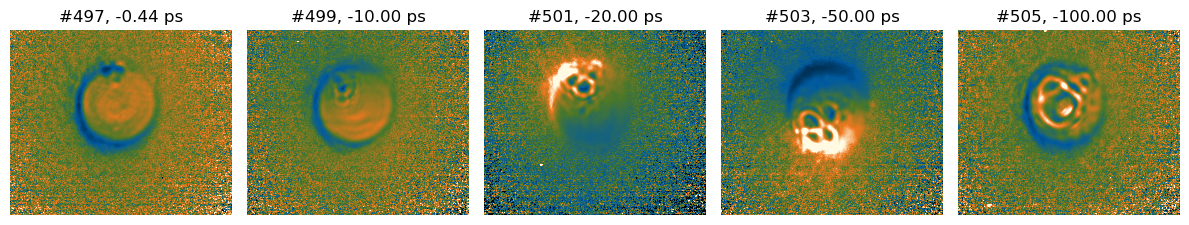

In [115]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import mmmUtils as mu
from importlib import reload 
import extra_mmm as em
import run_overview_lib_3430 as rol
import rossendorfer_farbenliste as rofl
reload(em)
reload(rol)
proposal=3430
todos=[]
todos.append([135,-5])
todos.append([141,-5])
#todos.append([144,0])
#todos.append([147,0])
todos.append([150,0])
todos.append([156,2])
todos.append([162,5])
todos.append([165,10])
#todos.append([183,0])
todos.append([189,-1])

todos=[]
if 0:
    proj='01-Sat-centered'
    todos.append([225,100])
    todos.append([219,100])
    todos.append([222,100])
    todos.append([225,100])
    todos.append([228,100])
    # todos.append([231,100])
    todos.append([234,100])
    todos.append([237,100])
    todos.append([240,100])
    todos.append([243,100])
    todos.append([246,100])
    todos.append([246,100])
    todos.append([261,100])

if 0:
    proj='02-Sat-defocus'
    todos.append([246,0])
    todos.append([255,30])
    todos.append([258,-30])

if 0:
    proj='03-Sat-coated'
    todos.append([278,0])
    todos.append([281,0])
    todos.append([284,0])
    todos.append([287,0])
    todos.append([294,0])
    todos.append([297,0])
    todos.append([300,0])
    todos.append([303,0])
    todos.append([306,0])
    todos.append([309,0])
if 0:    
    proj='04-Sat-coated'
    todos.append([312,0])
    todos.append([315,0])
    todos.append([318,0])
    todos.append([321,0])
    todos.append([324,0])
    todos.append([327,0])
    todos.append([330,0])
    todos.append([333,0])
    todos.append([336,0])
    todos.append([339,0])
    todos.append([342,0])
    todos.append([345,0])
    todos.append([348,0])
if 0:    
    proj='05-Sat-evening'
#    todos.append([358,0])
    todos.append([360,0])
    todos.append([362,0])
    todos.append([364,0])
    todos.append([366,0])
    todos.append([368,0])
    todos.append([370,0])
 #   todos.append([373,0])
#    todos.append([375,0])
    todos.append([377,0])
    todos.append([379,0])
    todos.append([381,0])
    todos.append([383,0])
    todos.append([385,0])
    todos.append([387,0])
    todos.append([389,0])
 #   todos.append([391,0])
#    todos.append([393,0])
 #   todos.append([396,0])
  #  todos.append([398,0])
    todos.append([400,0])
    todos.append([402,0])

if 0:    
    proj='06-Sat-night'
    todos.append([402,0])
    #todos.append([405,0])
    #todos.append([406,0])
    todos.append([407,0])
    #todos.append([409,0])
    todos.append([410,0])
    todos.append([412,0])
    todos.append([414,0])
    todos.append([416,0])
    todos.append([418,0])
    todos.append([420,0])
    todos.append([422,0])
    todos.append([424,0])
    todos.append([426,0])
    todos.append([428,0])
    todos.append([430,0])
    todos.append([432,0])
    todos.append([434,0])
    todos.append([436,0])
    todos.append([438,0])
    todos.append([440,0])
    todos.append([442,0])

if 1:    
    proj='07-Sun-morning'
    #todos.append([444,0])
    #todos.append([446,0.2])
    #todos.append([448,-0.2])
    #todos.append([450,-0.15])
    #todos.append([453,-0.1])
    #todos.append([456,-0.3])
    #todos.append([459,-0.3])
    #todos.append([461,-0.8])
    #todos.append([463,-0.8])
    #todos.append([465,-5])
    #todos.append([467,-10])
    #todos.append([469,-10])
    #todos.append([471,-10])
    #todos.append([473,-1])
    #todos.append([475,-0.8])
    #todos.append([477,-0.8])
    #todos.append([479,-0.8])
    
    todos.append([497,-1])
    todos.append([499,-10])
    todos.append([501,-20])
    todos.append([503,-50])
    todos.append([505,-100])
if 0:    
    proj='07-Sun-noon-5umfocus'    
    todos.append([508,-20])
    todos.append([511,-1])
    todos.append([513,0])
    todos.append([515,-1])
    todos.append([517,-5])
    todos.append([520,-1])
    todos.append([522,-1])
    todos.append([524,-1])
    todos.append([526,-1])
    todos.append([528,-1])
    todos.append([530,-1])


#sorting
dels=[]
for todo in todos:
    runNo=todo[0]
    #if todo[1]==100:
    if 1:
        run = em.open_run(proposal, runNo, data='all')  #Opening the given run
        delay,tr=em.get_array(run,'phaseshifter_playground',trainId=-1)
        #delay,tr=em.get_array(run,'phaseshifter',trainId=-1)
        delay_c=rol.correct_delay(runNo,delay)

#        delay_c,tr=em.get_array(run,'delay_actual',trainId=-1)
        todo[1]=delay_c
    dels.append(todo[1])
    print("shot {:.0f}, delay {:.2f} ps".format(runNo,delay_c))
    #dels.append(delay_c)
ass=np.argsort(dels)    
ass=np.flip(ass)

print('Starting')
mu.figure(12,10)
si=1
usepreshot=1
cols=5
rows=np.ceil(np.shape(todos)[0]/cols)


#main cycle
for ti in ass:
    plt.subplot(rows,cols,si)
    si+=1
    runNo=todos[ti][0]
    delay=todos[ti][1]
    print("shot {:.0f}, delay {:.2f} ps".format(runNo,delay))
    reload(rol)
    preshot=-1
    if runNo==396: preshot=-2
    if runNo==456: preshot=-2
    if runNo==459: preshot=-2
    if runNo==520: preshot=-2
    if runNo==511: preshot=-2
    if runNo==508: preshot=+1

    zyla=rol.zyla_make(runNo,preshotoffset=preshot)
    plt.title("#{:.0f}, {:.2f} ps".format(runNo,delay))
    

    if np.size(zyla)<=1: continue
    plt.imshow(zyla, cmap=rofl.cmap())
    mz=np.nanmean(zyla)
#    plt.colorbar()
    perc=np.percentile(zyla,95)
    plt.clim(0,perc)
    plt.axis('off')

plt.tight_layout()
#plt.title(proj)
'''plt.savefig('../'+proj+'_zyla.jpg',dpi=200)        
'''
plt.savefig('../'+proj+'.jpg',dpi=200)        
print('done.')

done.


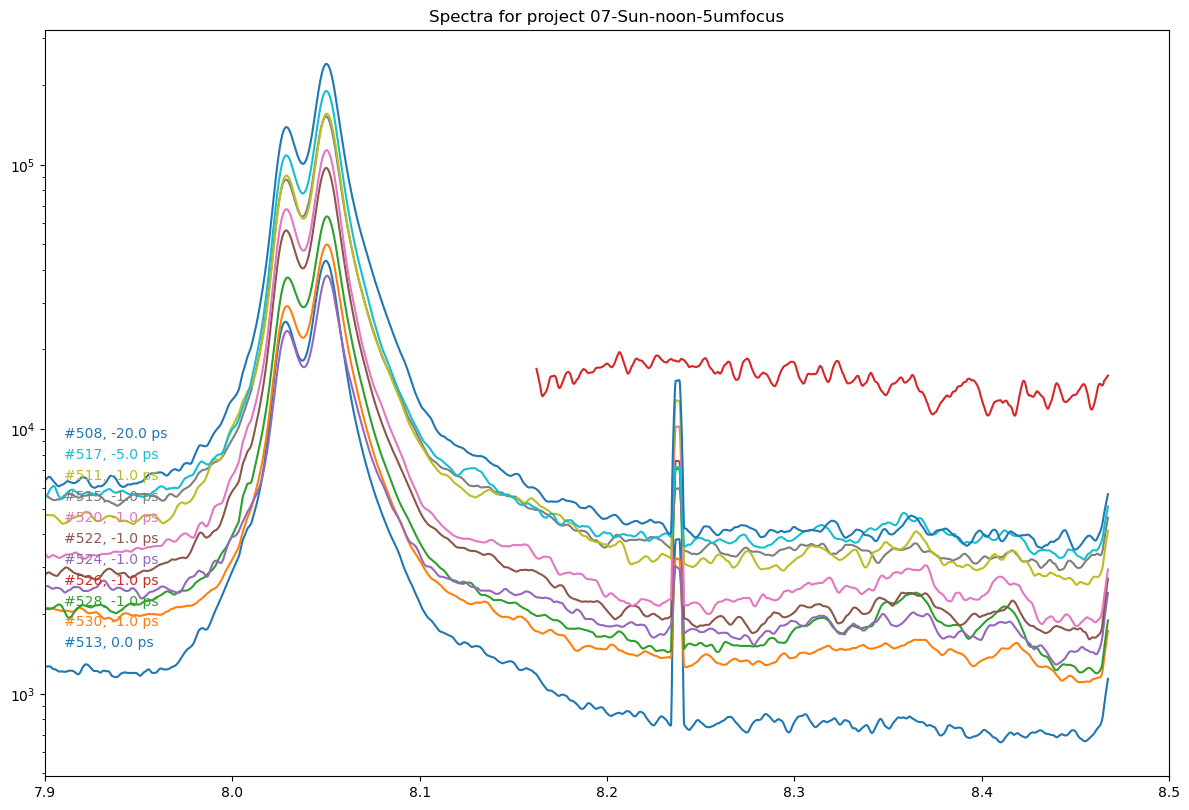

In [105]:
#main cycle
mu.figure()
for posi,ti in enumerate(ass):
    si+=1
    runNo=todos[ti][0]
    delay=todos[ti][1]
    reload(rol)
    x,spec=rol.hapg_make(runNo,full=1)
    spec=mu.smooth(spec,15)
    rw=1.2
    yoff=rw**posiweirdweirdweirdweirdweirdweirdweirdweirdweirdweirdweird
    #print(yoff)
    l=plt.semilogy(x,spec*yoff)
    col=l[0].get_color()
    plt.text(7.91,1500*yoff,"#{:.0f}, {:.1f} ps".format(runNo,delay),color=col)
plt.xlim(7.9,8.5)
plt.tight_layout()
plt.title('Spectra for project '+proj)

plt.savefig('../'+proj+'_spectra.jpg',dpi=200)        

print('done.')